In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', size=15) 

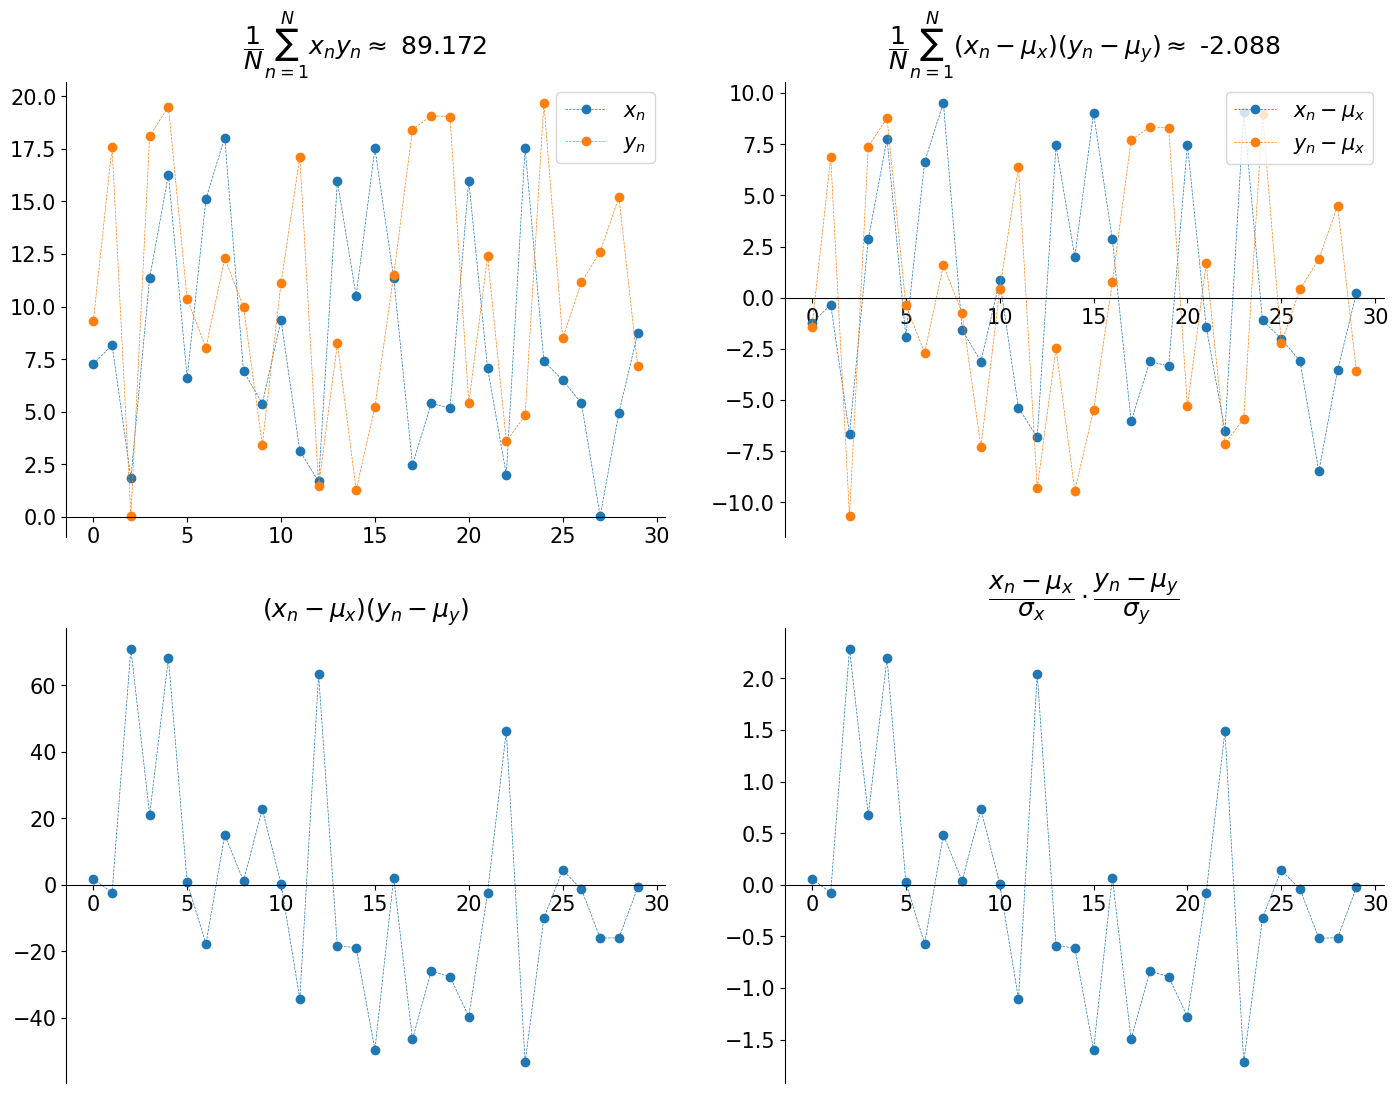

In [2]:
n_samples = 30
scale = 20

x = scale * np.random.rand(n_samples)
y = scale * np.random.rand(n_samples)

fig, axs = plt.subplots(2, 2, figsize=(17, 13))

axs[0, 0].plot(x, "o--", linewidth=0.5)
axs[0, 0].plot(y, "o--", linewidth=0.5)
axs[0, 0].set_title("$\\dfrac{1}{N} \\sum_{n=1}^N x_n y_n \\approx$ %.3f" % (np.mean(x * y)))
axs[0, 0].legend(["$x_n$", "$y_n$"], loc="upper right")


x_c = x - x.mean()
y_c = y - y.mean()
axs[0, 1].plot(x_c, "o--", linewidth=0.5)
axs[0, 1].plot(y_c, "o--", linewidth=0.5)
axs[0, 1].set_title("$\\dfrac{1}{N} \\sum_{n=1}^N (x_n - \\mu_x)( y_n - \\mu_y) \\approx$ %.3f" % (np.mean(x_c * y_c)))
axs[0, 1].legend(["$x_n - \\mu_x$", "$y_n - \\mu_x$"], loc="upper right")

axs[1, 0].plot(x_c * y_c, "o--", linewidth=0.5)
axs[1, 0].set_title("$(x_n - \mu_x)(y_n - \mu_y)$")

sigma_x = np.sqrt(np.mean(x_c**2))
sigma_y = np.sqrt(np.mean(y_c**2))
axs[1, 1].plot(x_c * y_c / sigma_x / sigma_y, "o--", linewidth=0.5)
axs[1, 1].set_title("$\\dfrac{x_n - \mu_x}{\\sigma_x} \cdot \\dfrac{y_n - \mu_y}{\\sigma_y}$")

for ax in axs.flatten().tolist():
    ax.spines['bottom'].set_position("zero")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [5]:
import pandas as pd

df = pd.read_csv("../data/galton-families.csv")
df

,Unnamed: 0,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,0,001,78.5,67.0,75.43,4,1,male,73.2
1,1,001,78.5,67.0,75.43,4,2,female,69.2
2,2,001,78.5,67.0,75.43,4,3,female,69.0
3,3,001,78.5,67.0,75.43,4,4,female,69.0
4,4,002,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...,...
929,929,203,62.0,66.0,66.64,3,1,male,64.0
930,930,203,62.0,66.0,66.64,3,2,female,62.0
931,931,203,62.0,66.0,66.64,3,3,female,61.0
932,932,204,62.5,63.0,65.27,2,1,male,66.5


In [6]:
def corrcoeff(x, y):
    x_c = x - x.mean()
    y_c = y - y.mean()
    s_x = np.sqrt(np.mean(x_c**2))
    s_y = np.sqrt(np.mean(y_c**2))

    return np.mean(x_c * y_c) / s_x / s_y

    

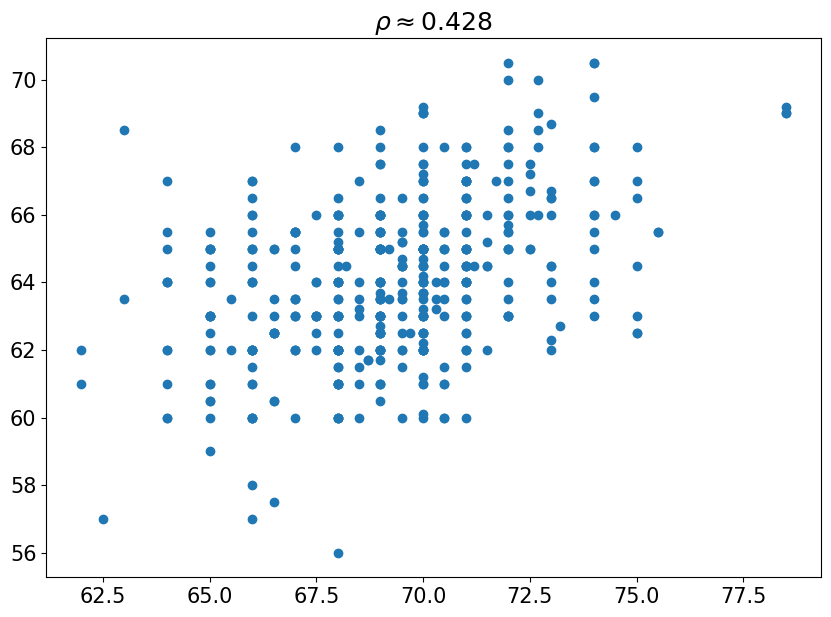

In [7]:
father_daughter = df[df.gender == "female"][["father", "childHeight"]]

fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(father_daughter.father, father_daughter.childHeight)
ax.set_title("$\\rho \\approx$%.3f" % (corrcoeff(father_daughter.father, father_daughter.childHeight)));

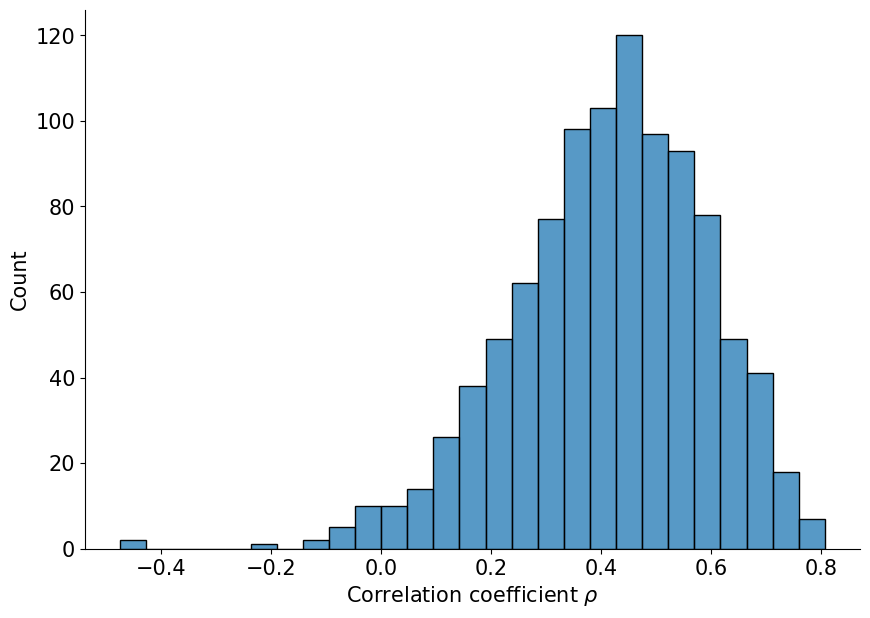

In [8]:
import random

N = 25
n_mc = 1000

father_daughter.reset_index()

cc = []
for i_mc in range(n_mc):
    idx = random.sample(range(len(father_daughter)), N)
    sample = father_daughter.iloc[idx]
    x = sample.father.to_numpy()
    y = sample.childHeight.to_numpy()
    cc.append(corrcoeff(x, y))

fig, ax = plt.subplots(figsize=(10, 7))
sns.histplot(cc)
ax.set_xlabel("Correlation coefficient $\\rho$")
sns.despine()
